In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 95% 315M/331M [00:02<00:00, 144MB/s]
100% 331M/331M [00:02<00:00, 136MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/utkface-new.zip","r")
zip_ref.extractall("/content")
zip_ref.close()


In [4]:
import os
from tqdm.notebook import tqdm
import random

In [5]:
Base_directory = "/content/UTKFace"
age_labels = []
gender_labels = []
Ethnicity_labels = []
imagepath_labels = []

image_filenames = os.listdir(Base_directory)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(Base_directory,image)
  image_labels = image.split("_")
  if len(image_labels) > 2:
    try:
      age_label = int(image_labels[0]) # Access the elements directly from image_labels
      gender_label = int(image_labels[1])
      Ethnicity_label = int(image_labels[2])
    except ValueError:
      pass
    age_labels.append(age_label)
    gender_labels.append(gender_label)
    Ethnicity_labels.append(Ethnicity_label)
    imagepath_labels.append(image_path)



  0%|          | 0/23708 [00:00<?, ?it/s]

In [6]:
print(f" Age Labels: {len(age_labels)}, Gender Labels: {len(gender_labels)}, Ethnicity Labels: {len(Ethnicity_labels)}, imagepath_labels: {len(imagepath_labels)}")

 Age Labels: 23708, Gender Labels: 23708, Ethnicity Labels: 23708, imagepath_labels: 23708


In [7]:
gender_mapping = {0:"Male",1:"Female"}
ethnicity_mapping = {0:"White",1:"Black",2:"Asian",3:"Indian",4:"Others"}

In [8]:
import pandas as pd
df = pd.DataFrame({"Age":age_labels,"Gender":gender_labels,"Ethnicity":Ethnicity_labels,"Image_Path":imagepath_labels})
df

,Age,Gender,Ethnicity,Image_Path
0,45,1,0,/content/UTKFace/45_1_0_20170104185042110.jpg....
1,26,0,3,/content/UTKFace/26_0_3_20170117153621606.jpg....
2,27,1,2,/content/UTKFace/27_1_2_20170116171522295.jpg....
3,57,1,0,/content/UTKFace/57_1_0_20170110160643595.jpg....
4,25,0,0,/content/UTKFace/25_0_0_20170119171142840.jpg....
...,...,...,...,...
23703,69,0,1,/content/UTKFace/69_0_1_20170113184924520.jpg....
23704,1,0,2,/content/UTKFace/1_0_2_20161219140748280.jpg.c...
23705,63,1,0,/content/UTKFace/63_1_0_20170110122257987.jpg....
23706,25,1,0,/content/UTKFace/25_1_0_20170117143946804.jpg....


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         23708 non-null  int64 
 1   Gender      23708 non-null  int64 
 2   Ethnicity   23708 non-null  int64 
 3   Image_Path  23708 non-null  object
dtypes: int64(3), object(1)
memory usage: 741.0+ KB


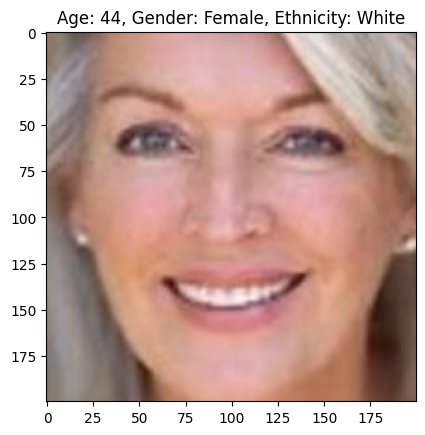

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
import numpy as np

random_index = random.randint(0,len(df))
age = df['Age'][random_index]
gender = gender_mapping[df['Gender'][random_index]]
ethnicity = ethnicity_mapping[df['Ethnicity'][random_index]]
img = Image.open(df['Image_Path'][random_index])
plt.title(f"Age: {age}, Gender: {gender}, Ethnicity: {ethnicity}")
plt.imshow(img)
plt.show()



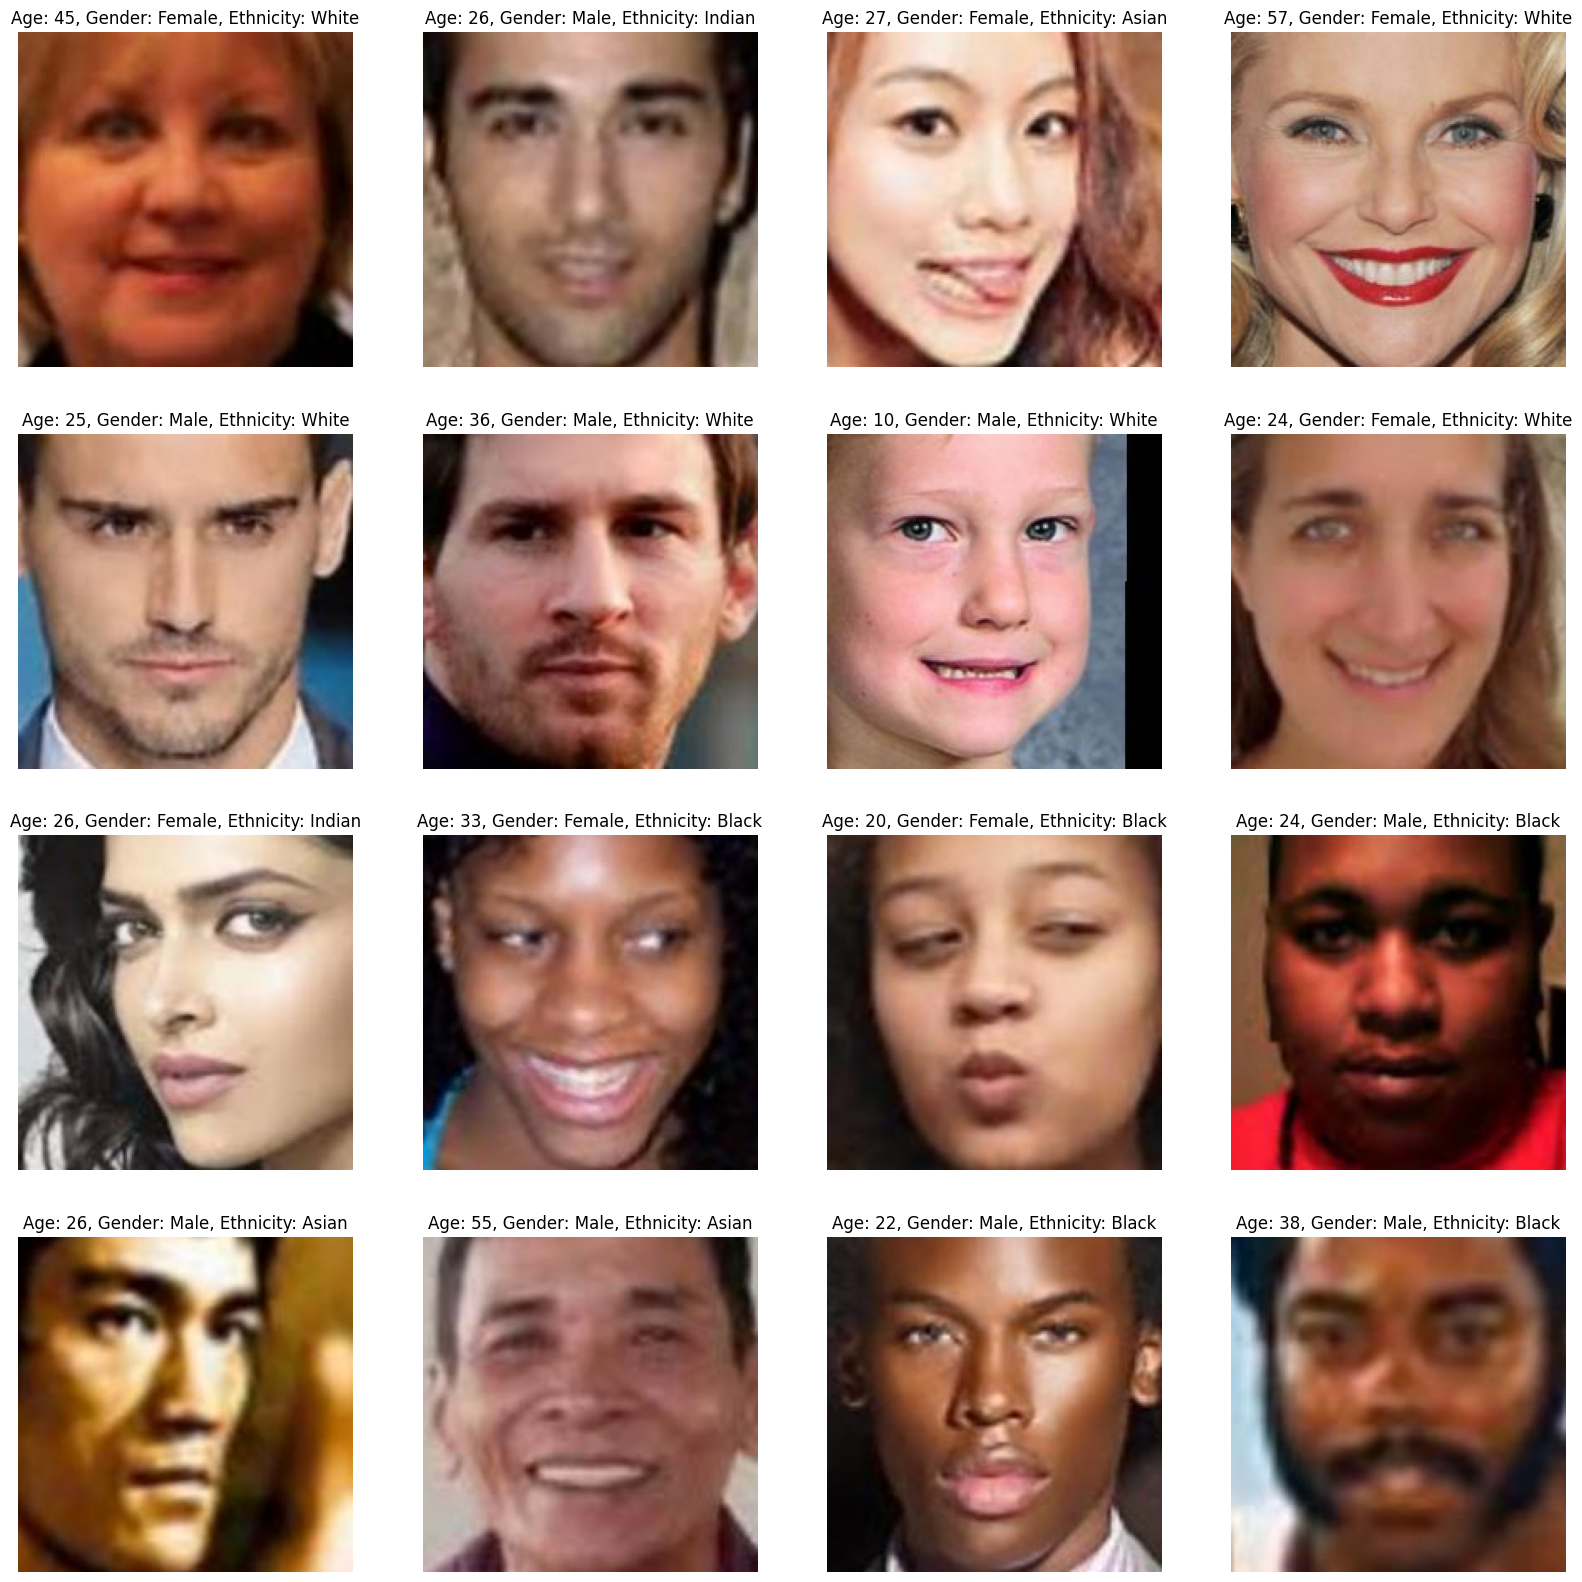

In [11]:
plt.figure(figsize=(20,20))
samples = df.iloc[0:16]

for index, age, gender, ethnicity,image_paths in samples.itertuples():  # the itertuples according to the dataset sequence
  plt.subplot(4,4,index+1)
  img = load_img(image_paths)
  img = np.array(img)
  plt.title(f"Age: {age}, Gender: {gender_mapping[gender]}, Ethnicity: {ethnicity_mapping[ethnicity]}")
  plt.imshow(img)
  plt.axis("off")


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(df,test_size=0.2,random_state=42)

In [14]:
train.shape

(18966, 4)

In [15]:
test.shape

(4742, 4)

In [16]:
train.head()

,Age,Gender,Ethnicity,Image_Path
5096,44,0,4,/content/UTKFace/44_0_4_20170103235250676.jpg....
19586,21,1,3,/content/UTKFace/21_1_3_20170109132139583.jpg....
9835,21,0,0,/content/UTKFace/21_0_0_20170114032114256.jpg....
13631,50,0,3,/content/UTKFace/50_0_3_20170119204521040.jpg....
9807,29,1,1,/content/UTKFace/29_1_1_20170117190515909.jpg....


In [17]:
def extract_image_features(images):
  features = []

  for image in tqdm(images):
    img = load_img(image)
    img = img.convert("RGB")
    img = img.resize((228,228))
    img = np.array(img)
    features.append(img)
  features = np.array(features)
  features = features.reshape(len(features), 228, 228, 3)
  return features

In [18]:
X_train = extract_image_features(train['Image_Path'])

  0%|          | 0/18966 [00:00<?, ?it/s]

In [19]:
X_train.shape

(18966, 228, 228, 3)

In [20]:
Y_age = np.array(train['Age'])
Y_gender = np.array(train['Gender'])
Y_ethnicity = np.array(train['Ethnicity'])


In [21]:
from keras.utils import to_categorical
Y_ethnicity = to_categorical(Y_ethnicity)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [23]:
input_shape=(228,228,3)

In [24]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.initializers import glorot_uniform

In [25]:

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(228,228,3))

# Freeze the VGG16 layers
for layer in conv_base.layers:
    layer.trainable = False

# Input layer
input_size = (228, 228, 3)
inputs = Input(input_size)

# Apply the VGG16 base model
X = conv_base(inputs)

# Flatten the output
X = Flatten()(X)

# Dense layers for shared representation
dense_1 = Dense(256, activation='relu')(X)
dropout_1 = Dropout(0.4)(dense_1)

# Dense layers specific to each task
dense_2 = Dense(256, activation='relu')(X)
dropout_2 = Dropout(0.4)(dense_2)

dense_3 = Dense(128, activation='relu')(X)
dropout_3 = Dropout(0.4)(dense_3)

# Output layers
output_1 = Dense(1, activation='sigmoid', name='gender_output')(dropout_1)  # Gender output
output_2 = Dense(1, activation='linear', name='age_output')(dropout_2)      # Age output
output_3 = Dense(5, activation='softmax', name='ethnicity_output')(dropout_3)    # Race output

model = Model(inputs=inputs, outputs=[output_1, output_2, output_3])

model.summary()








58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 228, 228, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 25088)          │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │      6,422,784 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │      6,422,784 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │      3,211,392 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender_output (Dense)     │ (None, 1)              │            257 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age_output (Dense)        │ (None, 1)              │            257 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ethnicity_output (Dense)  │ (None, 5)              │            645 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 30,772,807 (117.39 MB)

 Trainable params: 16,058,119 (61.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
model.compile(loss={'gender_output':'binary_crossentropy','age_output':'mse','ethnicity_output':'categorical_crossentropy'},
          optimizer='adam',metrics={'gender_output':'accuracy','age_output':'mean_absolute_error','ethnicity_output':'accuracy'})



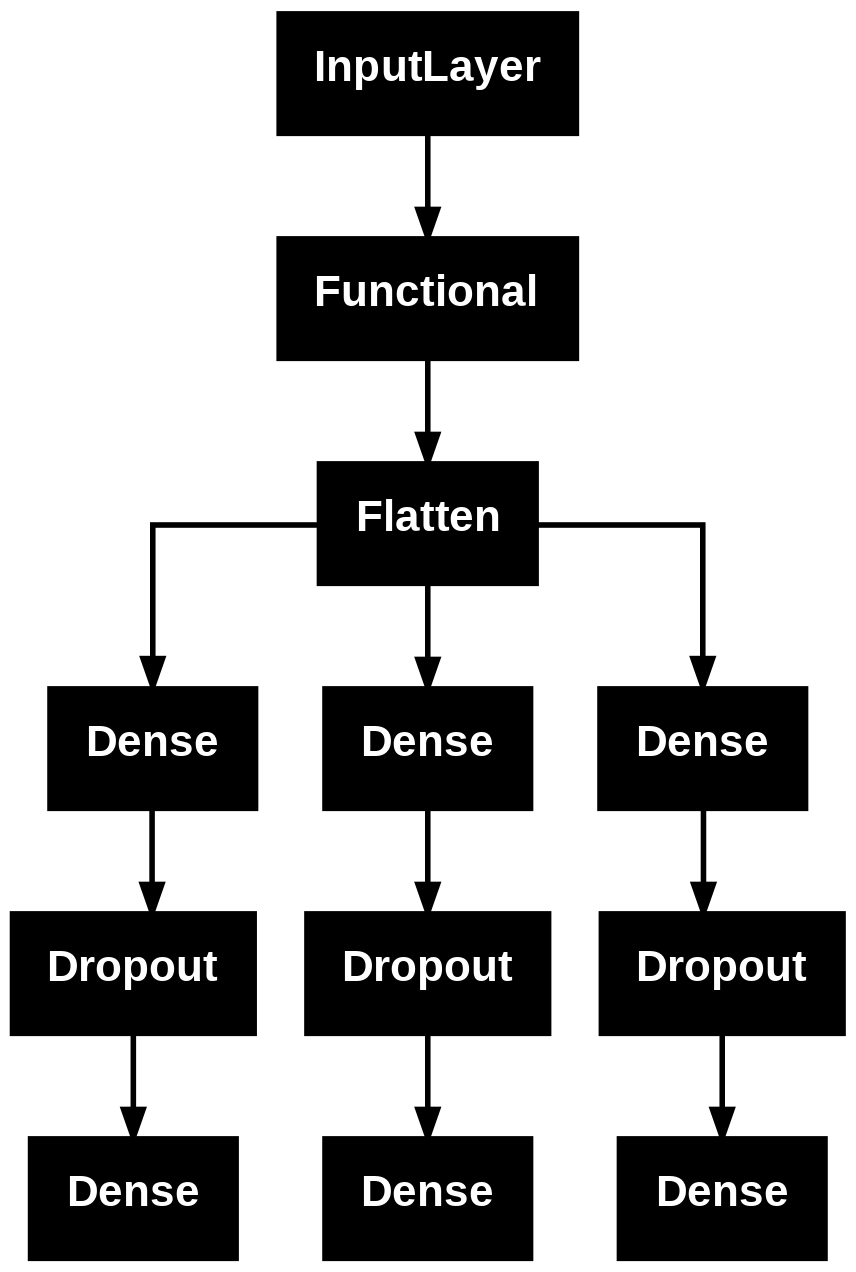

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [28]:
history = model.fit(X_train,
                    {'gender_output':Y_gender , 'age_output': Y_age, 'ethnicity_output':Y_ethnicity},
                    batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 120s 213ms/step - age_output_mean_absolute_error: 37.8472 - ethnicity_output_accuracy: 0.4177 - gender_output_accuracy: 0.7872 - loss: 3334.7559 - val_age_output_mean_absolute_error: 32.9572 - val_ethnicity_output_accuracy: 0.4193 - val_gender_output_accuracy: 0.8885 - val_loss: 1484.8184
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 113s 186ms/step - age_output_mean_absolute_error: 33.0232 - ethnicity_output_accuracy: 0.4416 - gender_output_accuracy: 0.8756 - loss: 1495.4220 - val_age_output_mean_absolute_error: 32.5166 - val_ethnicity_output_accuracy: 0.4183 - val_gender_output_accuracy: 0.8946 - val_loss: 1455.8342
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 138s 178ms/step - age_output_mean_absolute_error: 32.5309 - ethnicity_output_accuracy: 0.4420 - gender_output_accuracy: 0.8928 - loss: 1460.3162 - val_age_output_mean_absolute_error: 32.0865 - val_ethnicity_output_accuracy: 0.4186 - val_gender_output_accuracy: 0.8814 - val_loss: 1426.5499
Epoch 4/10

In [31]:
history.history.keys()

dict_keys(['age_output_mean_absolute_error', 'ethnicity_output_accuracy', 'gender_output_accuracy', 'loss', 'val_age_output_mean_absolute_error', 'val_ethnicity_output_accuracy', 'val_gender_output_accuracy', 'val_loss'])

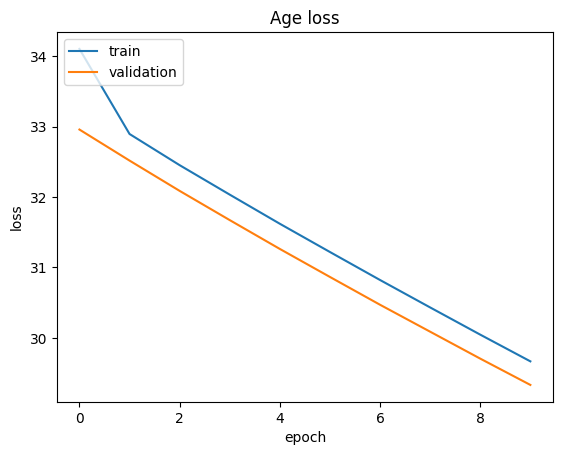

In [32]:
plt.plot(history.history['age_output_mean_absolute_error'])
plt.plot(history.history['val_age_output_mean_absolute_error'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

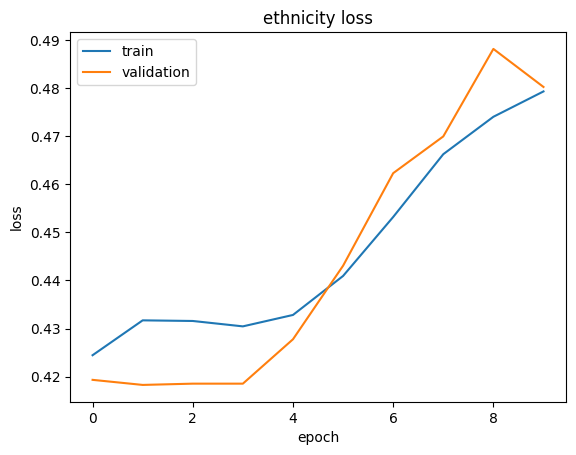

In [34]:
plt.plot(history.history['ethnicity_output_accuracy'])
plt.plot(history.history['val_ethnicity_output_accuracy'])
plt.title('ethnicity loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()